# Charts for Stack Overflow Survey 2020 (Python)

## Preparation

In [19]:
from bisect import bisect_left
from collections import Counter
from itertools import accumulate
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# You can check the available styles by uncommenting the following line:
# plt.style.available

In [21]:
# Change the chart style
plt.style.use('Solarize_Light2')

In [22]:
# You can see the results for other languages by changing `LANGUAGE`.
LANGUAGE = 'Python'

DIR_OUT = Path('out') / LANGUAGE

DPI = 144

# Each item is (`column name`, `multiple answers`)
COLUMNS: tuple[str, bool] = (
    ('DevType', True),
    ('EdLevel', False),
    ('UndergradMajor', False),
    ('LanguageWorkedWith', True),
    ('LanguageDesireNextYear', True),
    ('DatabaseWorkedWith', True),
    ('DatabaseDesireNextYear', True),
    ('PlatformWorkedWith', True),
    ('PlatformDesireNextYear', True),
    ('WebframeWorkedWith', True),
    ('WebframeDesireNextYear', True),
    ('OpSys', False),
    ('NEWCollabToolsWorkedWith', True),
    ('NEWCollabToolsDesireNextYear', True),
    ('JobFactors', True),
)

FILE_IN = 'data/survey_results_public.csv'

In [23]:
def calc_summary(series, sep=';', labeled_ratio=0.9):
    '''Generate stats summary data for a series.'''
    count_dict = Counter(
        item for cell in series.str.split(sep)
            if isinstance(cell, list)
            for item in cell
    )
    count = count_dict.most_common()

    labeled_total_count = sum(x[1] for x in count) * labeled_ratio
    accumulated_counts = list(accumulate(x[1] for x in count))
    index = bisect_left(accumulated_counts, labeled_total_count)
    
    count_tops, count_others = count[:index], count[index:]
    count_tops.append(('others', sum(x[1] for x in count_others)))
    
    return count_tops

In [24]:
def prepare_pie(count_summary):
    '''Prepare a pie chart with a list of pairs of label and count.'''
    labels, values = zip(*count_summary)
    options = {
        'counterclock': False,
        'startangle': 90,
        'autopct': '%.0f%%',
    }

    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, **options)

    # Set aspect ratio 1:1.
    ax.axis('equal')

In [25]:
def prepare_bar_horizontal(count_summary, total, ratio_margin=None):
    '''Prepare a horizontal bar chart with a list of pairs of label and count.'''
    labels, values = zip(*count_summary)
    indices = np.arange(len(labels))

    fig, ax = plt.subplots()
    ax.barh(indices, values)

    # Set settings related to y-axis.
    ax.set_yticks(indices)
    ax.set_yticklabels(labels)

    # Sort rows by the original order.
    ax.invert_yaxis()
    
    # Set max value to the total count.
    plt.xlim(0, total)
    
    # Add percentage labels.
    if not ratio_margin:
        ratio_margin = total / 50
    for i, v in zip(indices, values):
        ax.text(min(total, v) + ratio_margin, i + 0.2, f'{v / total * 100:2.0f}%')

In [26]:
def save_and_show(path):
    plt.savefig(path, dpi=DPI, bbox_inches='tight')
    plt.show()

## Load Data from CSV File

In [27]:
data_raw = pd.read_csv(FILE_IN, low_memory=False, dtype=str, keep_default_na=False)

In [28]:
data_raw.describe()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
count,64461,64461,64461,64461,64461,64461,64461,64461,64461,64461,...,64461,64461,64461,64461,64461,64461,64461,64461,64461,64461
unique,64461,6,3,111,64,4,3004,6959,184,143,...,4,4,3,13,3987,3790,7,158,53,53
top,54222,I am a developer by profession,Yes,NA,NA,NA,NA,NA,United States,NA,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NA,NA,Just as welcome now as I felt last year,NA,NA,NA
freq,1,47193,50388,19015,6561,24392,29635,29705,12469,18989,...,34626,38769,48871,31582,24437,22182,37201,23310,6777,18112


In [29]:
data_raw.columns.tolist()

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

In [30]:
languages = set()
for row in data_raw['LanguageWorkedWith']:
    for lang in row.split(';'):
        languages.add(lang)

sorted(languages)

['Assembly',
 'Bash/Shell/PowerShell',
 'C',
 'C#',
 'C++',
 'Dart',
 'Go',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'NA',
 'Objective-C',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VBA']

## Filter Data with `LanguageWorkedWith`

In [31]:
data = data_raw[data_raw['LanguageWorkedWith'].str.split(';').apply(lambda x: LANGUAGE in x)]

In [32]:
data.describe()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
count,25287,25287,25287,25287,25287,25287,25287,25287,25287,25287,...,25287,25287,25287,25287,25287,25287,25287,25287,25287,25287
unique,25287,6,2,86,54,4,1632,3986,164,122,...,4,4,3,13,2603,2915,7,124,53,52
top,35060,I am a developer by profession,Yes,NA,14,NA,NA,NA,United States,NA,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NA,NA,Just as welcome now as I felt last year,NA,5,NA
freq,1,16804,21000,5249,2429,9598,11328,11356,5964,7632,...,15504,17296,21539,12773,8674,7240,16137,8866,1930,7413


In [33]:
print(f'''Total: {len(data_raw):,}
Target: {len(data):,}
Percentage: {len(data) / len(data_raw) * 100:.1f}%''')

Total: 64,461
Target: 25,287
Percentage: 39.2%


## Render Charts

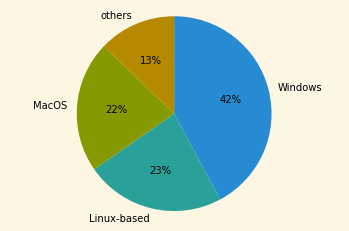

In [34]:
# Pie chart sample for single-answer question
data_os = data_raw['OpSys']
prepare_pie(calc_summary(data_os))
plt.show()
del data_os

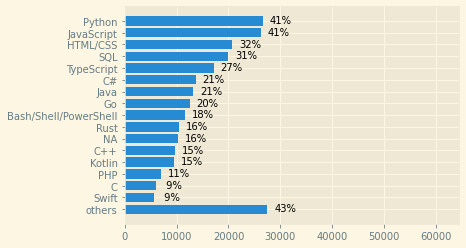

In [35]:
# Bar chart sample for multiple-answers question
data_lang = data_raw['LanguageDesireNextYear']
prepare_bar_horizontal(calc_summary(data_lang), len(data_lang))
plt.show()
del data_lang

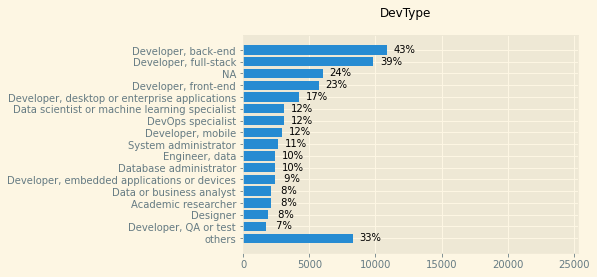

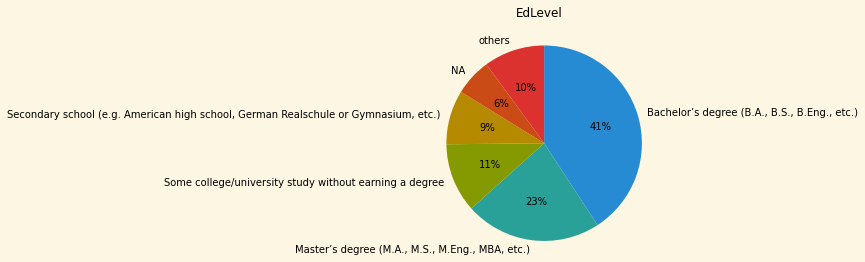

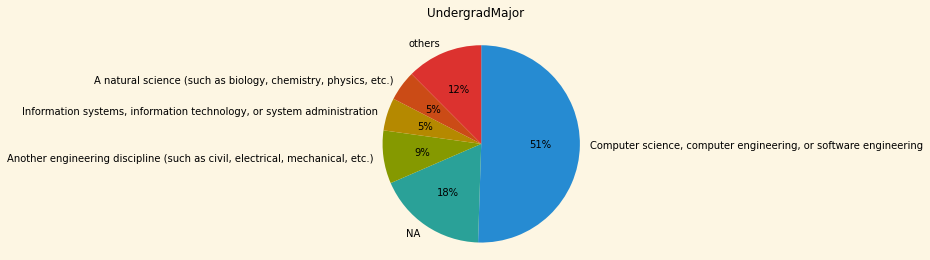

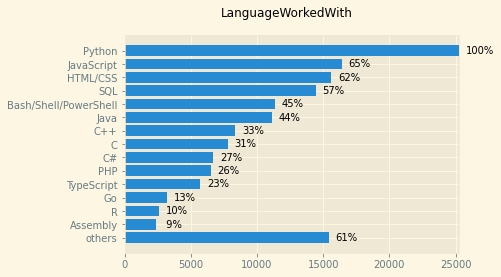

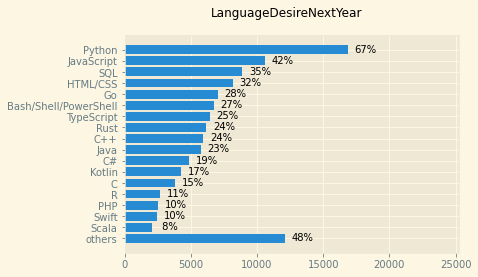

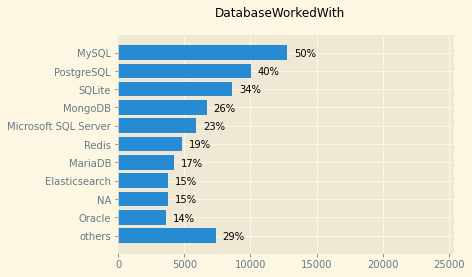

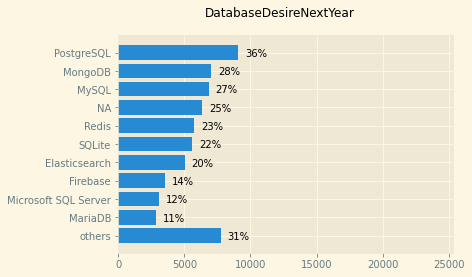

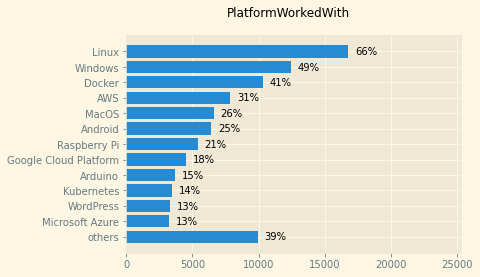

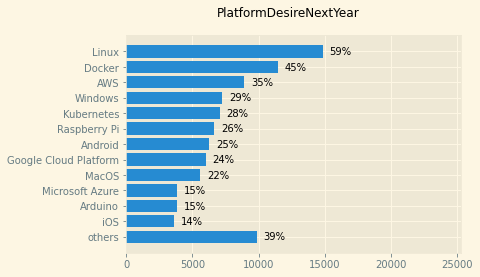

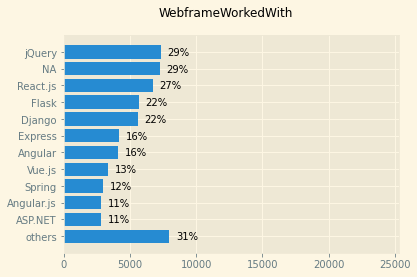

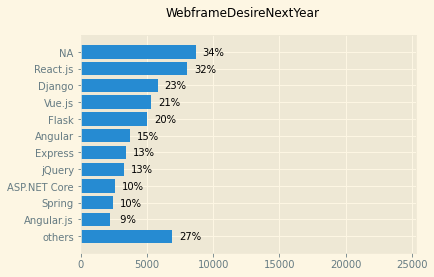

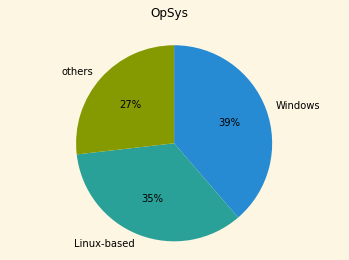

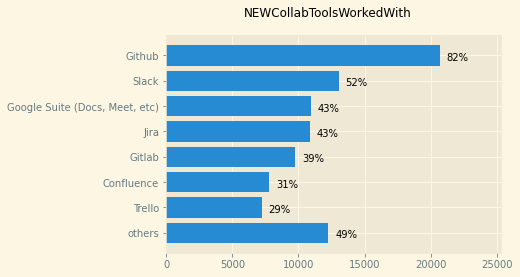

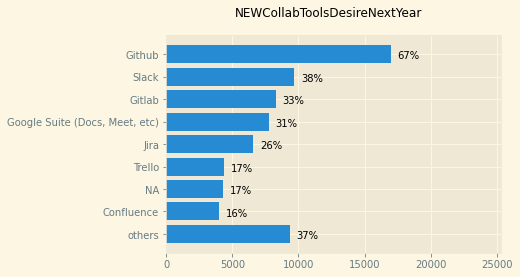

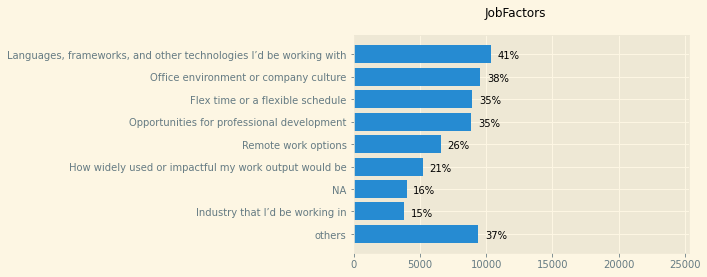

In [36]:
data_count = len(data)
if not DIR_OUT.is_dir():
    DIR_OUT.mkdir()
for column, is_multiple in COLUMNS:
    if is_multiple:
        prepare_bar_horizontal(calc_summary(data[column]), data_count)
    else:
        prepare_pie(calc_summary(data[column]))

    plt.suptitle(column)
    save_and_show(DIR_OUT / f'chart-{column}.png')